# Importing Libraries

In [1]:
# Importing all required libraries
import pandas as pd # Python library for data analysis and data frame
import networkx as nx  
import matplotlib.pyplot as plt

# Importing The .csv file of Station-Code

In [2]:
df = pd.read_csv('LondonTubeStationsZone1.csv')

# Preprocessing and Storing Required Data

In [3]:
df = df[df['Station'].notna()]
node = df['Code'].to_list()
name = df['Station'].to_list()

### Main Program Code For General Network Solution 
### and Graphical Representation Using 
# FLOYD-WARSHALL's ALGORITHM

In [4]:
print("\n\n\t\tName : Manimit Haldar");
print("\t\tSAP id : 1000015445\n");
print("\t   ***Floyd Warshall Algorithm***\n");
I = float('inf')	# define infinity
class Graph():
	def __init__(self, vertices, nodes, name):
		self.V = vertices
		self.node_list=nodes
		self.stations=name
		self.graph = [[I for column in range(vertices)]
					for row in range(vertices)]
		for i in range(0,vertices):
		    self.graph[i][i]=0
		self.path = ['' for column in range(vertices)]
		self.dist = [[I for column in range(vertices)]
                        for row in range(vertices)]
		self.G=nx.DiGraph()
		self.pos=nx.circular_layout(self.G)
	def add_edge(self, u, v, weight):
		self.graph[u][v] = weight
		self.graph[v][u] = weight
		self.G.add_edge(self.node_list[u],self.node_list[v],
                        weight=weight,label=f"{weight}")
		self.G.add_edge(self.node_list[v],self.node_list[u],
                        weight=weight,label=f"{weight}")
	def printPath(self, v, u, route):
	    if self.path[v][u] == v:
	        return
	    self.printPath(v, self.path[v][u], route)
	    route.append(self.path[v][u])
	def outputPath(self,source,destination):
		u = self.node_list.index(source)
		v = self.node_list.index(destination)
		p=0
		if v != u and self.path[u][v] != -1:
			route = [u]
			self.printPath(u, v, route)
			route.append(v)
			self.pathGraph(route)
			print(f'The Total Fare from {self.stations[u]} to {self.stations[v]} is £ {self.dist[u][v]}')
			p=1
		if p==0:
			print(f'There is no possible route from \
                    {source} to {destination} . . .')
	def floydWarshall(self):
	    if not self.graph:
	        return
	    n = len(self.graph)
	    cost = self.graph.copy()
	    self.path = [[None for x in range(n)] for y in range(n)]
	    for v in range(n):
	        for u in range(n):
	            if v == u:
	                self.path[v][u] = 0
	            elif cost[v][u] != float('inf'):
	                self.path[v][u] = v
	            else:
	                self.path[v][u] = -1
	    for k in range(n):
	        for v in range(n):
	            for u in range(n):
	                if 	cost[v][k] != float('inf') and \
						cost[k][u] != float('inf') and \
						(cost[v][k] + cost[k][u] < cost[v][u]):
	                    	cost[v][u] = cost[v][k] + cost[k][u]
	                    	self.path[v][u] = self.path[k][u]
	            if cost[v][v] < 0:
	                print('Negative-weight cycle found')
	                return
	    self.dist=cost
	def setNetwork(self):
		plt.figure(figsize=[30,30])
		self.pos=nx.kamada_kawai_layout(self.G)
		labels = nx.get_edge_attributes(self.G, 'label')
		nx.draw_networkx(self.G, self.pos, edge_color='black', 
                width=1,linewidths=1,node_size=1800, font_size=16, node_color='pink', 
                with_labels=True)
		nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=labels, 
                font_color='blue', font_size=15)
		plt.show()
	def pathGraph(self, route):
		routeGraph = nx.DiGraph()
		plt.figure(figsize=[30,30])
		self.pos=nx.kamada_kawai_layout(self.G)
		labels = nx.get_edge_attributes(self.G, 'label')
		nx.draw_networkx(self.G, self.pos, edge_color='black', 
                width=1,linewidths=1,node_size=1800, font_size=16, node_color='pink', 
                with_labels=True)
		nx.draw_networkx_edge_labels(self.G, self.pos, edge_labels=labels, 
                font_color='blue', font_size=15)

		for i in range(0,len(route)-1):
			routeGraph.add_edge((self.node_list[route[i]]),
                                (self.node_list[route[i+1]]),
                                label=f"{self.graph[route[i]][route[i+1]]}")
		nx.draw_networkx(routeGraph, self.pos, edge_color='#FF5441', width=2, 
				linewidths=1,node_size=2000, node_color='#4BFF1E', font_size=16, with_labels=True)
		labels = nx.get_edge_attributes(routeGraph, 'label')
		nx.draw_networkx_edge_labels(routeGraph, self.pos, 
                                edge_labels=labels, font_color='green', font_size=16)
		plt.show()



		Name : Manimit Haldar
		SAP id : 1000015445

	   ***Floyd Warshall Algorithm***



### Driver's Code for creation of
# London-City Subway Rail Network 

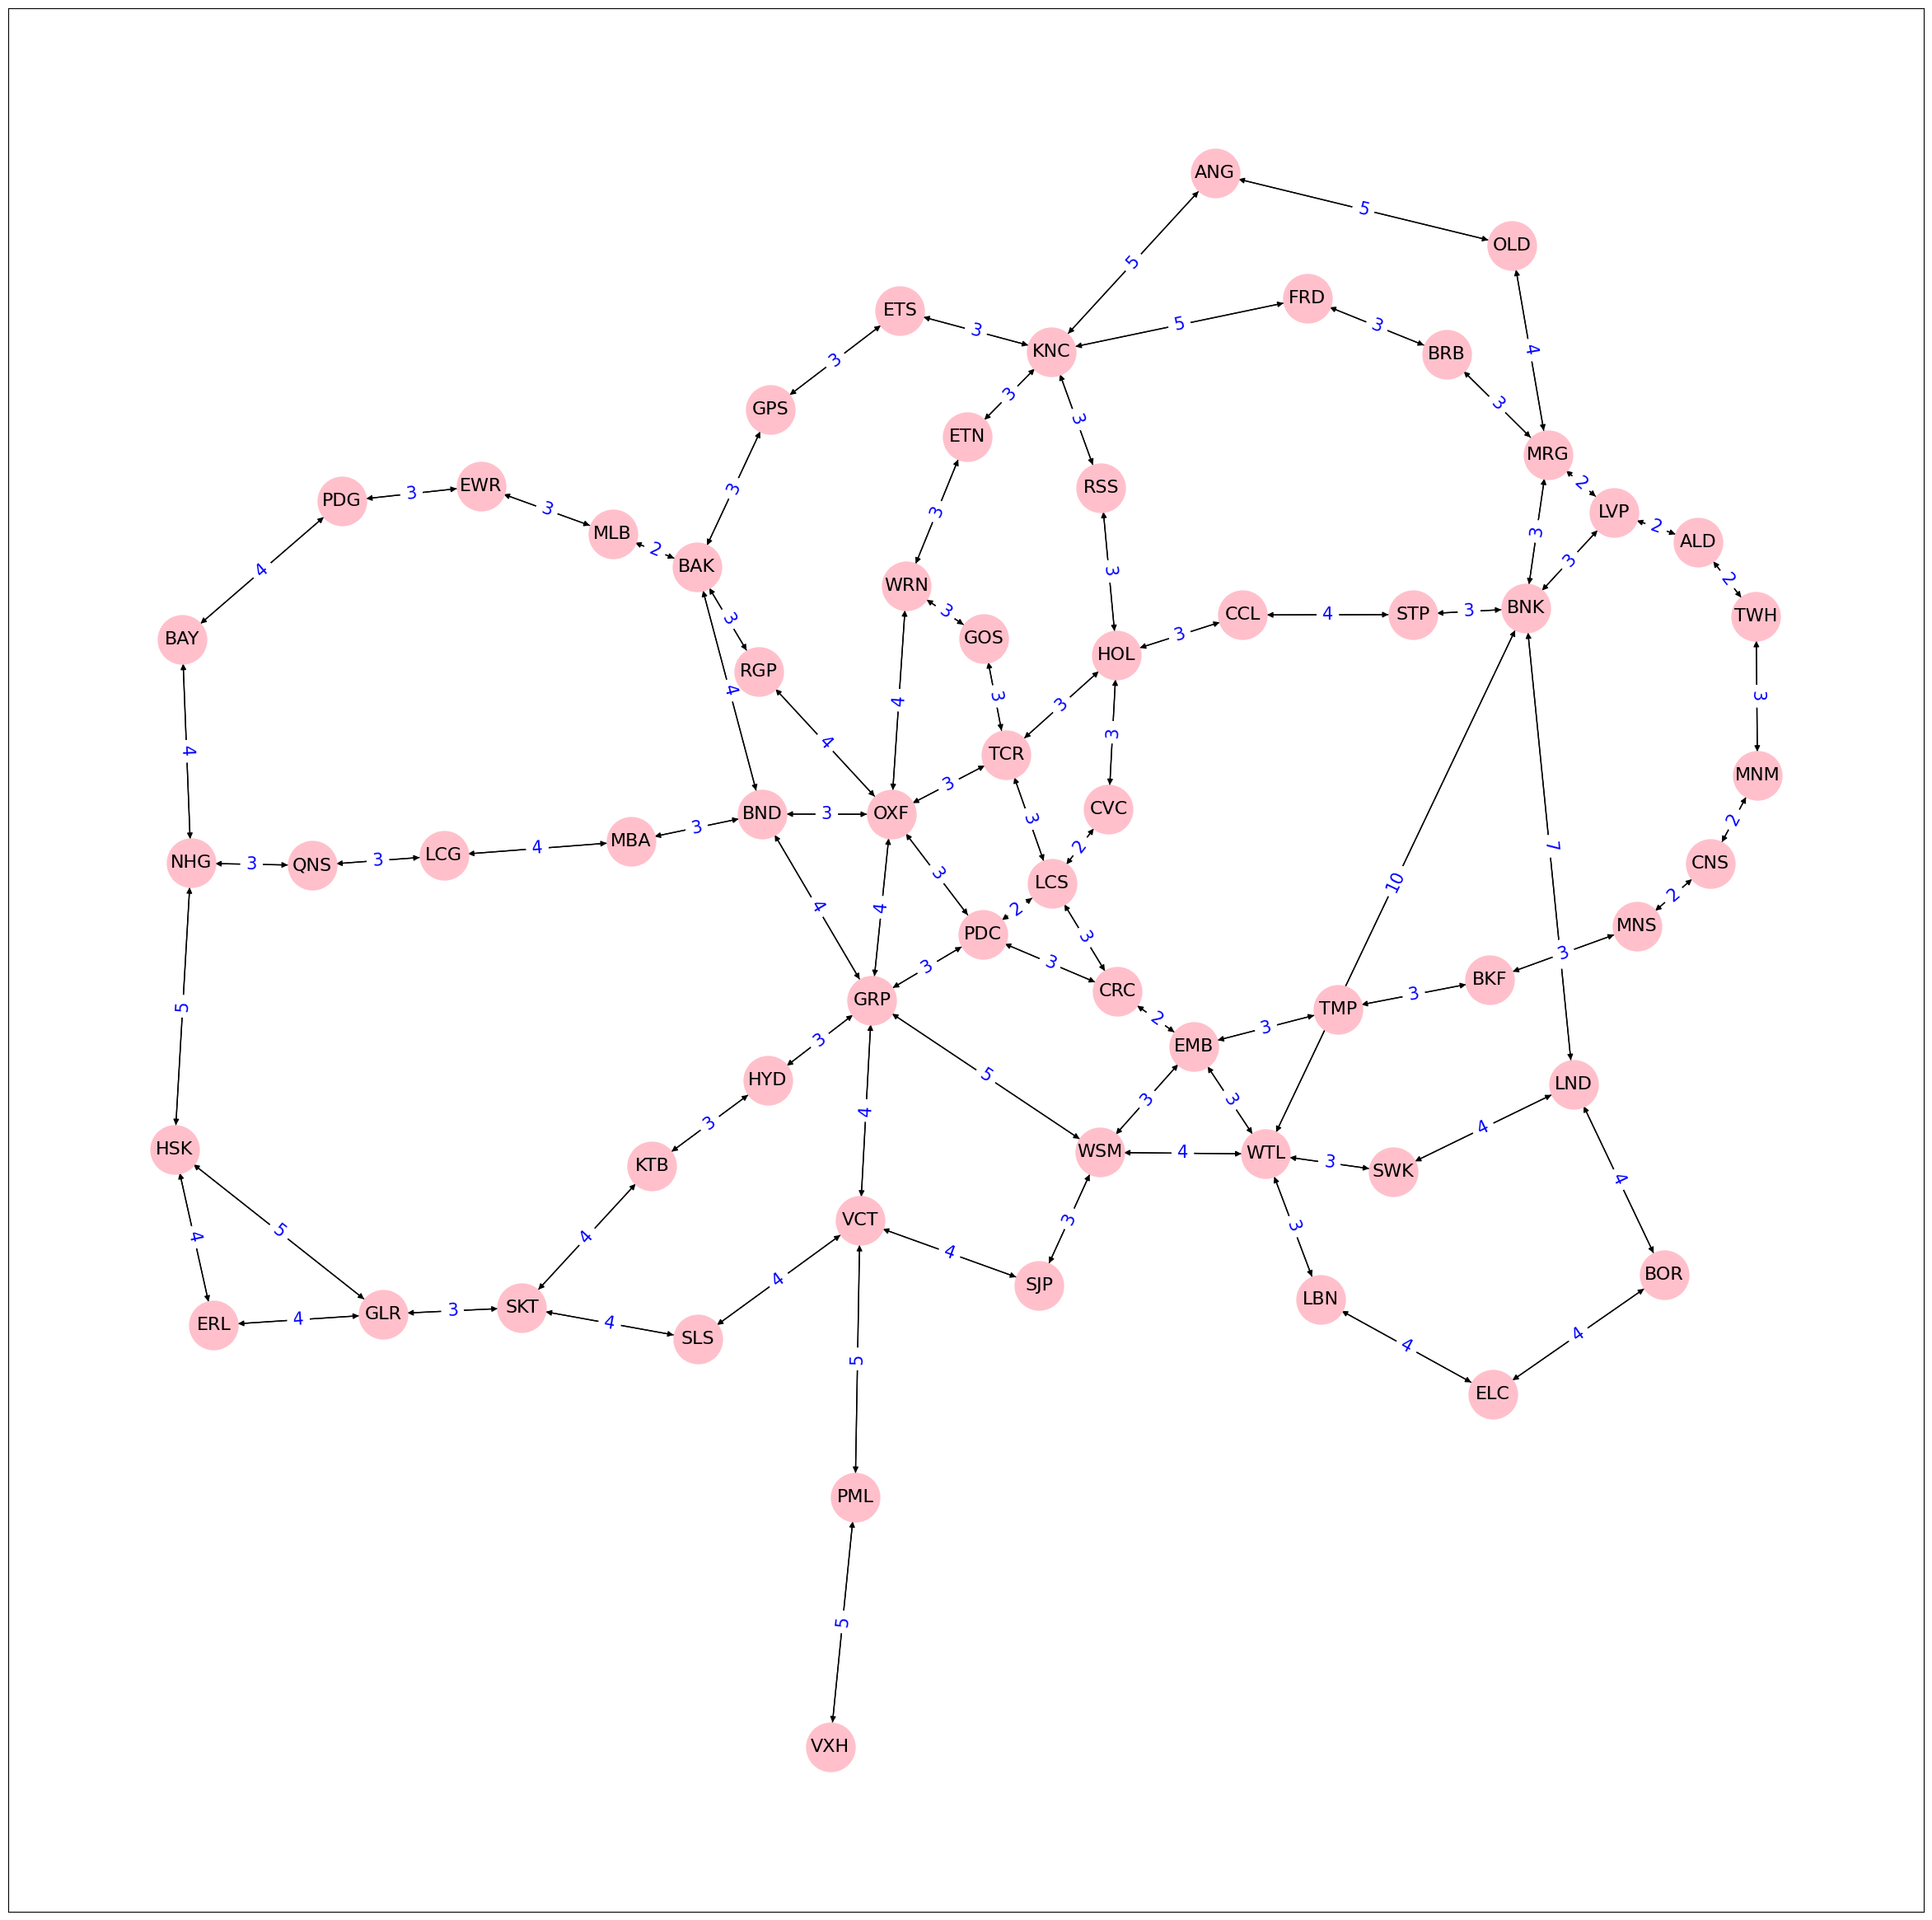

In [5]:

# Driver's code
if __name__ == "__main__":
	v = len(node)
	g = Graph(v,node,name)
	# Add Edges
	# RED LINE
	g.add_edge(node.index('KNC'),node.index('FRD'), 5)
	g.add_edge(node.index('FRD'),node.index('BRB'), 3)
	g.add_edge(node.index('BRB'),node.index('MRG'), 3)
	g.add_edge(node.index('MRG'),node.index('LVP'), 2)
	g.add_edge(node.index('LVP'),node.index('ALD'), 2)
	g.add_edge(node.index('KNC'),node.index('ETS'), 3)
	g.add_edge(node.index('ETS'),node.index('GPS'), 3)
	g.add_edge(node.index('GPS'),node.index('BAK'), 3)
	g.add_edge(node.index('BAK'),node.index('MLB'), 2)
	g.add_edge(node.index('MLB'),node.index('EWR'), 3)
	# BLUE LINE
	g.add_edge(node.index('KNC'),node.index('RSS'), 3)
	g.add_edge(node.index('RSS'),node.index('HOL'), 3)
	g.add_edge(node.index('HOL'),node.index('CVC'), 3)
	g.add_edge(node.index('CVC'),node.index('LCS'), 2)
	g.add_edge(node.index('LCS'),node.index('PDC'), 2)
	g.add_edge(node.index('PDC'),node.index('GRP'), 3)
	g.add_edge(node.index('GRP'),node.index('HYD'), 3)
	g.add_edge(node.index('HYD'),node.index('KTB'), 3)
	g.add_edge(node.index('KTB'),node.index('SKT'), 4)
	g.add_edge(node.index('SKT'),node.index('GLR'), 3)
	g.add_edge(node.index('GLR'),node.index('ERL'), 4)
	g.add_edge(node.index('ERL'),node.index('HSK'), 4)
	# YELLOW LINE
	g.add_edge(node.index('ALD'),node.index('TWH'), 2)
	g.add_edge(node.index('TWH'),node.index('MNM'), 3)
	g.add_edge(node.index('MNM'),node.index('CNS'), 2)
	g.add_edge(node.index('CNS'),node.index('MNS'), 2)
	g.add_edge(node.index('MNS'),node.index('BKF'), 3)
	g.add_edge(node.index('BKF'),node.index('TMP'), 3)
	g.add_edge(node.index('TMP'),node.index('EMB'), 3)
	g.add_edge(node.index('EMB'),node.index('WSM'), 3)
	g.add_edge(node.index('WSM'),node.index('SJP'), 3)
	g.add_edge(node.index('SJP'),node.index('VCT'), 4)
	g.add_edge(node.index('VCT'),node.index('SLS'), 4)
	g.add_edge(node.index('SLS'),node.index('SKT'), 4)
	# GREEN LINE
	g.add_edge(node.index('GLR'),node.index('HSK'), 5)
	g.add_edge(node.index('HSK'),node.index('NHG'), 5)
	g.add_edge(node.index('NHG'),node.index('BAY'), 4)
	g.add_edge(node.index('BAY'),node.index('PDG'), 4)
	g.add_edge(node.index('PDG'),node.index('EWR'), 3)
	# ORANGE LINE
	g.add_edge(node.index('LVP'),node.index('BNK'), 3)
	g.add_edge(node.index('BNK'),node.index('STP'), 3)
	g.add_edge(node.index('STP'),node.index('CCL'), 4)
	g.add_edge(node.index('CCL'),node.index('HOL'), 3)
	g.add_edge(node.index('HOL'),node.index('TCR'), 3)
	g.add_edge(node.index('TCR'),node.index('OXF'), 3)
	g.add_edge(node.index('OXF'),node.index('BND'), 3)
	g.add_edge(node.index('BND'),node.index('MBA'), 3)
	g.add_edge(node.index('MBA'),node.index('LCG'), 4)
	g.add_edge(node.index('LCG'),node.index('QNS'), 3)
	g.add_edge(node.index('QNS'),node.index('NHG'), 3)
	# BROWN LINE
	g.add_edge(node.index('BAK'),node.index('RGP'), 3)
	g.add_edge(node.index('RGP'),node.index('OXF'), 4)
	g.add_edge(node.index('OXF'),node.index('PDC'), 3)
	g.add_edge(node.index('PDC'),node.index('CRC'), 3)
	g.add_edge(node.index('CRC'),node.index('EMB'), 2)
	g.add_edge(node.index('EMB'),node.index('WTL'), 3)
	g.add_edge(node.index('WTL'),node.index('LBN'), 3)
	g.add_edge(node.index('LBN'),node.index('ELC'), 4)
	# BLACK LINE
	g.add_edge(node.index('ELC'),node.index('BOR'), 4)
	g.add_edge(node.index('BOR'),node.index('LND'), 4)
	g.add_edge(node.index('LND'),node.index('BNK'), 7)
	g.add_edge(node.index('BNK'),node.index('MRG'), 3)
	g.add_edge(node.index('MRG'),node.index('OLD'), 4)
	g.add_edge(node.index('OLD'),node.index('ANG'), 5)
	g.add_edge(node.index('ANG'),node.index('KNC'), 5)
	g.add_edge(node.index('KNC'),node.index('ETN'), 3)
	g.add_edge(node.index('ETN'),node.index('WRN'), 3)
	g.add_edge(node.index('WRN'),node.index('GOS'), 3)
	g.add_edge(node.index('GOS'),node.index('TCR'), 3)
	g.add_edge(node.index('TCR'),node.index('LCS'), 3)
	g.add_edge(node.index('LCS'),node.index('CRC'), 3)
	# GREY LINE
	g.add_edge(node.index('BAK'),node.index('BND'), 4)
	g.add_edge(node.index('BND'),node.index('GRP'), 4)
	g.add_edge(node.index('GRP'),node.index('WSM'), 5)
	g.add_edge(node.index('WSM'),node.index('WTL'), 4)
	g.add_edge(node.index('WTL'),node.index('SWK'), 3)
	g.add_edge(node.index('SWK'),node.index('LND'), 4)
	# SKY LINE
	g.add_edge(node.index('WRN'),node.index('OXF'), 4)
	g.add_edge(node.index('OXF'),node.index('GRP'), 4)
	g.add_edge(node.index('GRP'),node.index('VCT'), 4)
	g.add_edge(node.index('VCT'),node.index('PML'), 5)
	g.add_edge(node.index('PML'),node.index('VXH'), 5)
	g.add_edge(node.index('BNK'),node.index('WTL'), 10)
	
	g.setNetwork()
	

## Network Solution for Required Source and Destination Stations (Nodes)

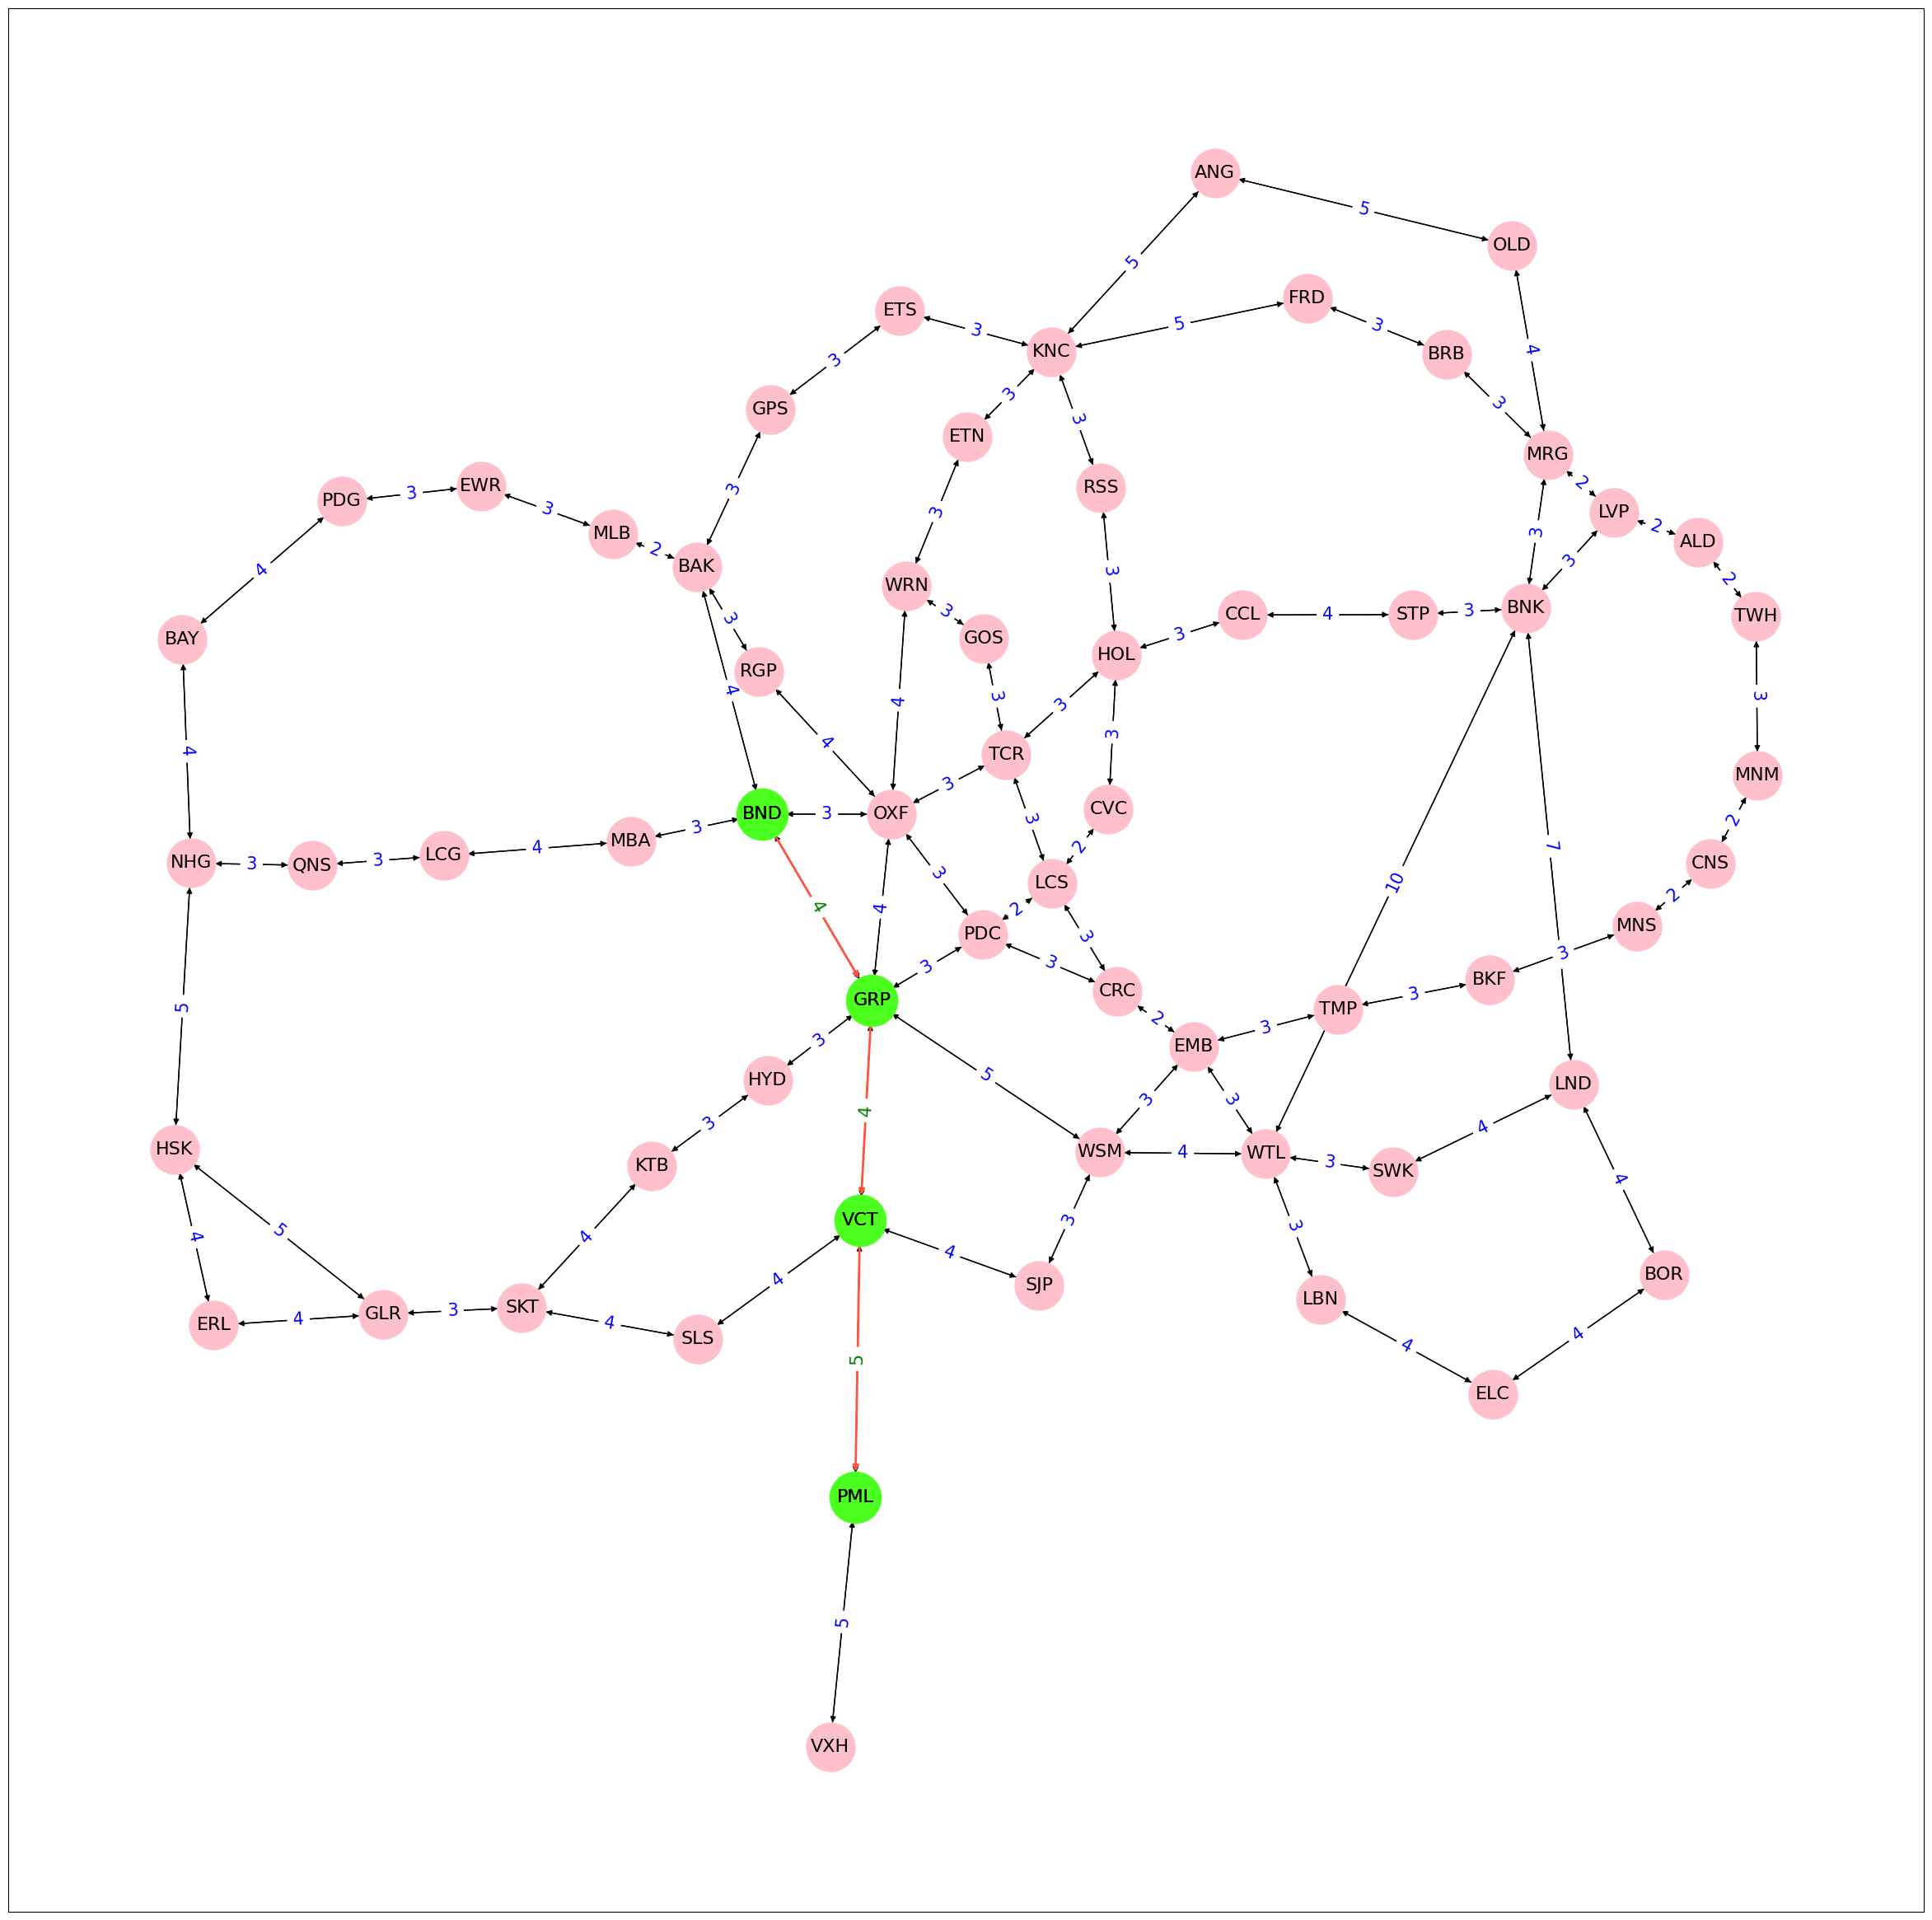

The Total Fare from Bond Street to Pimlico is £ 13





In [6]:
g.floydWarshall()
print("\n\n")
source=node[name.index(input("Enter Source : "))]
destination=node[name.index(input("Enter Destination : "))]
g.outputPath(source,destination)
print("\n\n")